In [2]:
!pip install seaborn


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import os
os.getcwd()

'C:\\Users\\Adarsh\\Downloads'

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Global_Superstore(CSV).csv")
print(df.head())  # It will give the first 5 rows.
print(df.shape) # shape will show the numbers of rows and columns in data set.
print(df.columns) # columns will give all the columns present in the data set.
print(df.info()) # This will give the data types and null data present in the data set.

   Row ID                  Order ID  Order Date   Ship Date     Ship Mode  \
0   40098  CA-2014-AB10015140-41954  11/11/2014  11/13/2014   First Class   
1   26341    IN-2014-JR162107-41675    2/5/2014    2/7/2014  Second Class   
2   25330    IN-2014-CR127307-41929  10/17/2014  10/18/2014   First Class   
3   13524   ES-2014-KM1637548-41667   1/28/2014   1/30/2014   First Class   
4   47221   SG-2014-RH9495111-41948   11/5/2014   11/6/2014      Same Day   

    Customer ID     Customer Name      Segment  Postal Code           City  \
0  AB-100151402     Aaron Bergman     Consumer      73120.0  Oklahoma City   
1     JR-162107     Justin Ritter    Corporate          NaN     Wollongong   
2     CR-127307      Craig Reiter     Consumer          NaN       Brisbane   
3    KM-1637548  Katherine Murray  Home Office          NaN         Berlin   
4    RH-9495111       Rick Hansen     Consumer          NaN          Dakar   

   ...   Product ID    Category Sub-Category  \
0  ...  TEC-PH-5816 

In [13]:
print(df.isnull().sum()) # here the isnull() will give the all null items and the sum will give exactly the number of null values.

Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Postal Code       806
City                0
State               0
Country             0
Region              0
Market              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping Cost       0
Order Priority      0
dtype: int64


In [20]:
df.fillna("Unknown", inplace=True)  # Here the fillna will replace all the null vlaues with the place holder i.e. Unknown, and (inplace = True) will make the changes in the original dataset also. 
print(df.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Postal Code       0
City              0
State             0
Country           0
Region            0
Market            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64


In [22]:
Q1 = df["Sales"].quantile(0.25)  # It will give the lower fence of sales data set.
Q3 = df["Sales"].quantile(0.75)  # It will give the higher fence of sales data set.
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[(df["Sales"] >= lower) & (df["Sales"] <= upper)]   # This will exclude all the outliers from the data set.
print(df)

     Row ID                  Order ID  Order Date   Ship Date       Ship Mode  \
0     40098  CA-2014-AB10015140-41954  11/11/2014  11/13/2014     First Class   
1     26341    IN-2014-JR162107-41675    2/5/2014    2/7/2014    Second Class   
3     13524   ES-2014-KM1637548-41667   1/28/2014   1/30/2014     First Class   
4     47221   SG-2014-RH9495111-41948   11/5/2014   11/6/2014        Same Day   
5     22732    IN-2014-JM156557-41818   6/28/2014    7/1/2014    Second Class   
..      ...                       ...         ...         ...             ...   
995   24278   IN-2015-JF1541527-42095    4/1/2015    4/5/2015  Standard Class   
996   36249  CA-2015-AS10225140-42347   12/9/2015  12/13/2015    Second Class   
997   30517   IN-2014-CK1259592-41929  10/17/2014  10/19/2014    Second Class   
998    1408   MX-2014-SS2014018-41658   1/19/2014   1/26/2014  Standard Class   
999   20944  ID-2015-RP19855130-42348  12/10/2015  12/14/2015  Standard Class   

      Customer ID      Cust

In [20]:
import pandas as pd
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna("Hello", inplace=True)
df = pd.read_csv("Downloads/Global_Superstore(CSV).csv")
print(df.describe())  # This describes the data set like count=Number of non-null values,mean=Gives the mean of the columns,std = give the standard deviation of the columns,In mean there will be the smalles value from the whole row, likewise 25%,50%,75% contain the values that are coreesponding to them,and max will give the maximum value from all the rowa.

             Row ID   Postal Code        Sales    Quantity     Discount  \
count   1000.000000    194.000000  1000.000000  1000.00000  1000.000000   
mean   25079.328000  53966.170103  1710.971470     5.55800     0.092840   
std    12897.726632  33734.306466  1259.239238     2.71846     0.148666   
min       58.000000   2920.000000     1.910000     1.00000     0.000000   
25%    15118.750000  19134.000000   826.907500     4.00000     0.000000   
50%    25084.500000  60564.000000  1585.115000     5.00000     0.000000   
75%    34524.000000  88187.500000  2477.812500     7.00000     0.150000   
max    51284.000000  98198.000000  9892.740000    14.00000     0.800000   

            Profit  Shipping Cost  
count  1000.000000    1000.000000  
mean    288.920440     272.384897  
std     574.504782     176.160716  
min   -3059.820000       1.070000  
25%      10.037500     209.827500  
50%     190.685000     258.897500  
75%     518.872500     351.070250  
max    4946.370000     923.630000  


In [5]:
corr = df.corr(numeric_only=True)
print(corr)   # here it will give the correlation between all the numeric values,the (numeric_only=True) will ensure that it will not work for non numeric values.


                 Row ID  Postal Code     Sales  Quantity  Discount    Profit  \
Row ID         1.000000     0.081866 -0.220878 -0.173947  0.032788 -0.043650   
Postal Code    0.081866     1.000000 -0.020776 -0.028340  0.066625 -0.046650   
Sales         -0.220878    -0.020776  1.000000  0.555691 -0.187997  0.533676   
Quantity      -0.173947    -0.028340  0.555691  1.000000  0.034045  0.154481   
Discount       0.032788     0.066625 -0.187997  0.034045  1.000000 -0.505190   
Profit        -0.043650    -0.046650  0.533676  0.154481 -0.505190  1.000000   
Shipping Cost -0.284645    -0.007672  0.644891  0.356324 -0.169216  0.290593   

               Shipping Cost  
Row ID             -0.284645  
Postal Code        -0.007672  
Sales               0.644891  
Quantity            0.356324  
Discount           -0.169216  
Profit              0.290593  
Shipping Cost       1.000000  


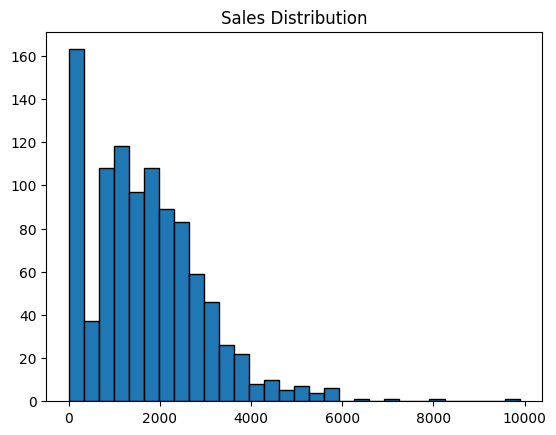

In [7]:
import matplotlib.pyplot as plt
plt.hist(df["Sales"], bins=30, edgecolor="black")  # here with the use of matplot we visualise the sales distribution in the data.
plt.title("Sales Distribution")  # this will allow to put title for the histogram.
plt.show()


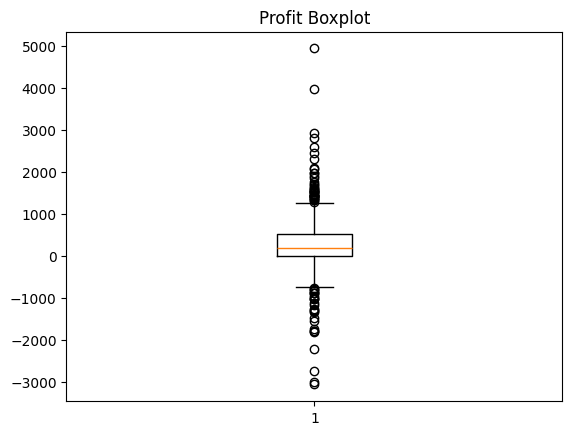

In [8]:
plt.boxplot(df["Profit"])
plt.title("Profit Boxplot")  # this is used to visualise the data in boxplot ,as we can quickly see the spreadness of data and outliers easily in the boxplot.
plt.show()


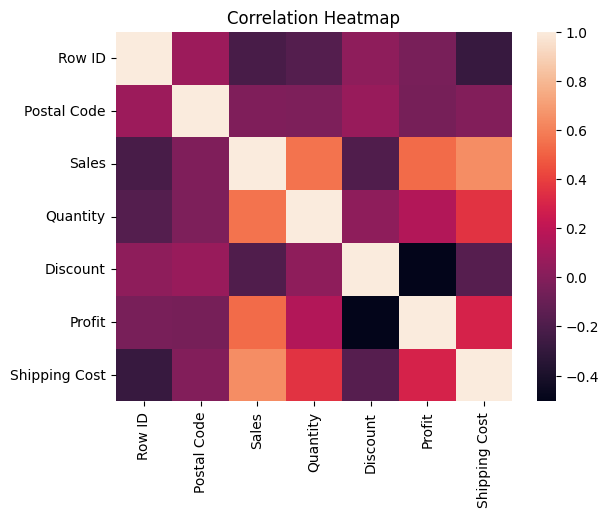

In [12]:
import seaborn as sns

sns.heatmap(corr)
plt.title("Correlation Heatmap") # This heatmap is used to visualise the correlation of the data i.e. how each columns are related to each other based on the colours if it is dark red colour = Strong positive relation,dark Blue = Strong negative relation,Light colour=weak relation.
plt.show()


In [23]:
df.to_csv("cleaned_superstore.csv", index=False    # this will create a new csv file which is cleaned means here there is no null values,no duplicates,outliers are removed.
 